## Node2Vec

Jay Urbain, PhD

Paper: [node2vec: Scalable Feature Learning for Networks](https://arxiv.org/abs/1607.00653)

Other references:    
https://github.com/aditya-grover/node2vec  
https://en.wikipedia.org/wiki/Graph_theory  
Graph Machine Learning: Take Graph Data to the Next Level by Applying Machine Learning Techniques and Algorithms by Aldo Marzullo, Claudio Stamile, and Enrico Deusebio  
https://pypi.org/project/node2vec/  
https://arxiv.org/pdf/1607.00653.pdf  
https://towardsdatascience.com/node2vec-explained-db86a319e9ab/     

Node2Vec is an algorithm that allows the user to map nodes in a graph G to an embedding space. Generally, the embedding space is of lower dimensions than the number of nodes in the original graph G. The algorithm tries to preserve the initial structure within the original graph. Essentially, the nodes which are similar within the graph will yield similar embeddings in the embedding space. These embedding spaces are essentially a vector corresponding to each node in the network. The graph embeddings are commonly used as input features to solve machine learning problems oriented around link prediction, community detection, classification, etc.

When dealing with very large graphs it’s quite difficult for scientists to visually represent the Data they’re working with. A common solution to see how a graph looks is to generate node embeddings associated with that graph and then visualize the embeddings in a lower-dimensional space. This allows you to visually see potential clusters or groups forming in very large networks.


In [12]:

# !pip install networkx
# !pip install seaborn
# !pip install node2vec
# !pip install scikit-learn

## Random Walks Generation

### Random Walks with Restart 

Each step you take is determined probabilistically. This implies that you have moved in a certain direction based on a probabilistic outcome. This algorithm explores the relationship to each step that you would take and its distance from the initial starting point.

Node2Vec introduces the following formula for determining the probability of moving to the node x given that you were previously at the node v.

![node2vec formula](1m4SlFTQtd3ZSqUpGZ-8Uzg.webp)

Where z is the normalization constant, and πvx is the unnormalized transition probability between nodes x and v. If there is no edge connecting x and v, then the probability will be 0, but if there is an edge, we identify a normalized probability of going from v to x.

The paper states that the easiest way to introduce a bias to influence the random walks would be if there is a weight associated with each edge. However, that wouldn’t work in the case of unweighted networks. To resolve this, the authors introduced a guided random walk governed by two parameters p and q. p indicates the probability of a random walk getting back to the previous node, and q indicates the probability that a random walk can pass through a previously unseen part of the graph.

![p, q](1Hewv8axfbOWLmjbWdE7KIg.webp)

Where dtx represents the shortest path between nodes t and x. It can be visually seen in the illustration below.

![node2vec](18I1CypymRZJPATjsTxg5PQ.webp)

Images taken from Node2Vec Paper

## Skip-Gram Architecture

Having a general knowledge of the word2vec is helpful for understanding what’s being done in node2vec. 

### Word2Vec 

The skip-gram model is a simple neural network with one hidden layer trained in order to predict the probability of a given word being present when an input word is present.

![skip gram](1M6UxaLSbNMeoDFWRN_kPeQ.webp)


Given some corpus of text, a target word is selected over some rolling window. The training data consists of pairwise combinations of that target word and all other words in the window. This is the resulting training data for the neural network. Once the model is trained, we can yield a probability of a word being a context word for a given target (embedding). The following image below represents the architecture of the neural network for the skip-gram model.

![skipgram](1UYAkOS9JQwdozQjCzttuow.webp)

A corpus can be represented as a vector of size N, where each element in N corresponds to a word in the corpus. During the training process, we have a pair of target and context words, the input array will have 0 in all elements except for the target word. The target word will be equal to 1. The hidden layer will learn the embedding representation of each word, yielding a d-dimensional embedding space. The output layer is a dense layer with a softmax activation function. The output layer will yield a vector of the same size as the input, each element in the vector will consist of a probability. This probability indicates the similarity between the target word and the associated word in the corpus.

## How Node2Vec Works


Node2vec begins by inputting a graph and running a set of random walks from the input graph. The walks can then be represented as a directed sequence of words where each node represents a word. The generated random walks are then passed into the skip-gram model. As explained above, the skip-gram model works on words and sentences, each node in the random walk can be represented as a word and the entire walk can be represented as a sentence. The result of the skip-gram model yields an embedding for each node (or word in this analogy). 

![Node2Vec](1ok8syTKrUC1_Qo7cFxZUeQ.png)

## Generate Network

The code below generates a random graph to use node2vec on. The user specifies the number of nodes and the degree distribution they want for the randomly generated network. The network will be generated through the configuration model. The configuration model generates a random graph through assigning edges to match a degree sequence. 

Since this is random, the resulting network will be different each time. Furthermore, this is just an example network to run node2vec on, just because the resulting network is a multi-graph doesn’t mean that node2vec can only run on other multi-graphs. Node2Vec can be ran on directed, undirected, weighted, multi, or regular networks. 

MultiGraph with 1000 nodes and 3127 edges


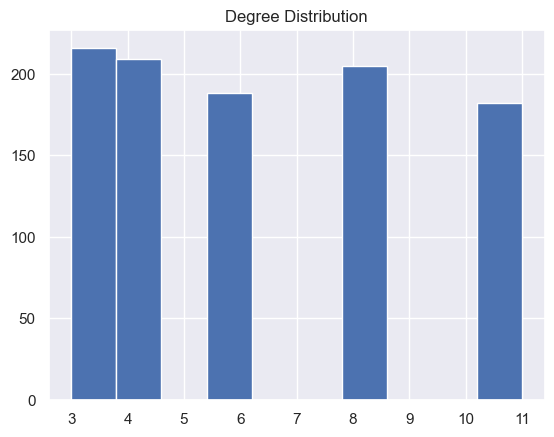

In [13]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from node2vec import Node2Vec as n2v
sns.set()

def generate_graph_deg_dist(deg_dist, n):
    '''
    This function will generate a networkx graph G based on a degree distribution
    provided by the user.
    
    params:
        deg_dist (Dictionary) : The key will be the degree and the value is the probability
                                of a node having that degree. The probabilities must sum to
                                1
        n (Integer) : The number of nodes you want the graph to yield
                          
    example:
        G = generate_graph_deg_dist(
                deg_dist = {
                    6:0.2,
                    3:0.14,
                    8:0.35,
                    4:0.3,
                    11:0.01
                },
                n = 1000
        )
    '''
    deg = list(deg_dist.keys())
    proba = list(deg_dist.values())
    if sum(proba) == 1.:
        deg_sequence = np.random.choice(
            deg,
            n,
            proba
        )
        
        if sum(deg_sequence) % 2 != 0:
            # to ensure that the degree sequence is always even for the configuration model
            deg_sequence[1] = deg_sequence[1] + 1
        
        return nx.configuration_model(deg_sequence)
    raise ValueError("Probabilities do not equal to 1")
    
G = generate_graph_deg_dist(
        deg_dist = {
            6:0.2,
            3:0.14,
            8:0.35,
            4:0.3,
            11:0.01
        },
        n = 1000
)

print(G)

# visualize degree distribution
plt.clf()
plt.hist(list(dict(G.degree()).values()))
plt.title('Degree Distribution')
plt.show()

Note: You can use any network to test this algorithm out. Just review the networkx documentation.

### Apply Node2Vec

Parameter Info 
- graph: a graph g, where all nodes must be integers or strings 
- dimensions: embedding dimensions (default: 128) 
- walk_length: number of nodes in each walk (default: 80) 
- num_walks: number of walks per node (default: 10) 
- weight_key: the key for the weight attribute on weighted graphs (default: 'weight') 
- workers: number of workers for parallel execution (default: 1)
- p: the probability of a random walk getting back to the previous node (default: 1)
- q: probability that a random walk can pass through a previously unseen part of the graph (default: 1)

The Node2Vec.fit method accepts any keyword argument acceptable by gensim.Word2Vec. The parameters mentioned above are documented in the node2vec library. 

Set the window value to be 1, the min_count to be 1, the batch_words to be 4, and the dimensions to be 16. 

Feel free to adjust these parameters accordingly to your own problem.

In [14]:
WINDOW = 1 # Node2Vec fit window
MIN_COUNT = 1 # Node2Vec min. count
BATCH_WORDS = 4 # Node2Vec batch words

g_emb = n2v(
  G,
  dimensions=16
)

mdl = g_emb.fit(
    vector_size = 16,
    window=WINDOW,
    min_count=MIN_COUNT,
    batch_words=BATCH_WORDS
)

input_node = '1'
for s in mdl.wv.most_similar(input_node, topn = 10):
    print(s)

Computing transition probabilities:   0%|          | 0/1000 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.62it/s]


('817', 0.8083930015563965)
('511', 0.779192328453064)
('368', 0.776083767414093)
('813', 0.7571462392807007)
('172', 0.7554267048835754)
('40', 0.746094822883606)
('995', 0.7435788512229919)
('139', 0.7398034930229187)
('748', 0.7280104756355286)
('637', 0.7256417274475098)


### Convert to Dataframe

In [9]:
emb_df = (
    pd.DataFrame(
        [mdl.wv.get_vector(str(n)) for n in G.nodes()],
        index = G.nodes
    )
)

### Visualize Embeddings

[]

<Figure size 640x480 with 0 Axes>

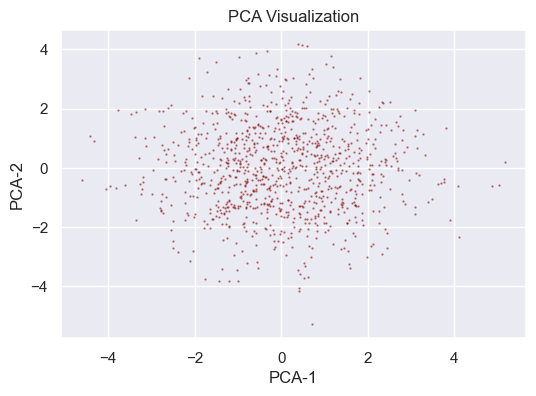

In [18]:
pca = PCA(n_components = 2, random_state = 7)
pca_mdl = pca.fit_transform(emb_df)

emb_df_PCA = (
    pd.DataFrame(
        pca_mdl,
        columns=['x','y'],
        index = emb_df.index
    )
)
plt.clf()
fig = plt.figure(figsize=(6,4))
plt.scatter(
    x = emb_df_PCA['x'],
    y = emb_df_PCA['y'],
    s = 0.4,
    color = 'maroon',
    alpha = 0.5
)
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('PCA Visualization')
plt.plot()

Why use Node2Vec?

Summary  
- It’s scalable and parallelizes easily
- Open sourced in python & spark
- Unique approach to learning feature representation via node embeddings
- The structure of the original network is preserved through the embeddings
- Node2Vec has many real world applications including and not limited to node classification, community detection, link prediction, etc.